In [ ]:
# Hamis Hesham Abdelfattah ALi_1910425#
#Noha Hany Mansour Khatab_ #
##

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns
from numpy import loadtxt, where
import pandas as pd
from pylab import scatter, show, legend, xlabel, ylabel

In [10]:
path = "C:\\Users\\Hamis Hesham\\Downloads\\LogisticRegression-master\\LogisticRegression-master\\data2.csv"
data = pd.read_csv(path, header=None, names=['midterm', 'final', 'case'])
data.head()
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
X = np.array(X.values)
y = np.array(y.values)

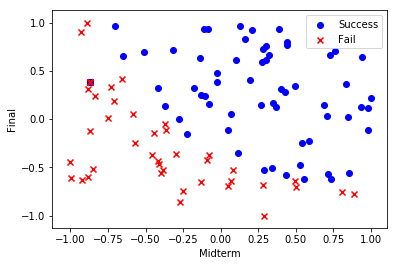

In [12]:
# visualize data
pos = where(y == 1)
neg = where(y == 0)
scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
xlabel('Midterm')
ylabel('Final')
legend(['Success', 'Fail'])
show()

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [19]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

In [20]:
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))
    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)
    return (cost_history, params)

In [21]:
def predict(X, params):
    return np.round(sigmoid(X @ params))

In [22]:
m = len(y)
X = np.hstack((np.ones((m,1)),X))
n = np.size(X,1)
params = np.zeros((n,1))
iterations = 1500  #100 #0.86 #1500 #0.89    #8000
learning_rate = 0.03
initial_cost = compute_cost(X, y, params)
print("Initial Cost is: {} \n".format(initial_cost))
(cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations)
print("Optimal Parameters are: \n", params_optimal, "\n")
y_pred = predict(X, params_optimal)
score = float(sum(y_pred == y))/ float(len(y))
print(score)

Initial Cost is: [[0.69312718]] 

Optimal Parameters are: 
 [[0.26663895]
 [0.26663895]
 [2.75337099]
 [2.51537746]] 

0.89
